고래 지갑 주소 및 거래소 지갑 주소 가져오기

In [211]:
import requests
from bs4 import BeautifulSoup

def get_addresses():
    url = "https://bitinfocharts.com/top-100-richest-bitcoin-addresses.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Remove hidden-desktop spans
    for span in soup.find_all('span', class_='hidden-desktop'):
        span.decompose()

    whale_addresses = []
    exchange_addresses = []
    combined_addresses = []

    # 숫자가 없는 경우를 확인하는 함수
    def no_digits(s):
        return all(not c.isdigit() for c in s)

    for row in soup.find_all('tr')[16:]:
        cols = row.find_all('td')
        if len(cols) > 1:
            address = cols[1].text.strip().split('wallet')[0].split(' ')[0]
            balance = float(cols[2].text.strip().replace(',', '').split(' ')[0])
            label = cols[1].text.strip().split(':')

            if balance >= 1000:
                whale_addresses.append(address)

            if 'wallet' in label[0]:
                label_text = label[1].strip().split()[0]  # 불필요한 정보 제거
                if no_digits(label_text):
                    exchange_addresses.append(address)

    for address in whale_addresses:
        if address in exchange_addresses:
            combined_addresses.append(address)
            
    # Remove combined addresses from both lists
    whale_addresses = [addr for addr in whale_addresses if addr not in combined_addresses]

    return whale_addresses, exchange_addresses, combined_addresses

whale_addresses, exchange_addresses, combined_addresses = get_addresses()
print("Whale Addresses:", whale_addresses)
print("Exchange Addresses:", exchange_addresses)

Whale Addresses: ['bc1q8yj0herd4r4yxszw3nkfvt53433thk0f5qst4g', '1Ay8vMC7R1UbyCCZRVULMV7iQpHSAbguJP', 'bc1qd4ysezhmypwty5dnw7c8nqy5h5nxg0xqsvaefd0qn5kq32vwnwqqgv4rzr', '1LdRcdxfbSnmCYYNdeYpUnztiYzVfBEQeC', '1AC4fMwgY8j9onSbXEWeH6Zan8QGMSdmtA', '1LruNZjwamWJXThX2Y8C2d47QqhAkkc5os', 'bc1qa2eu6p5rl9255e3xz7fcgm6snn4wl5kdfh7zpt05qp5fad9dmsys0qjg0e', 'bc1qxu4nfkdf8a97mey8ke3npg3aggvskvvcdgndnvxn5upv7jypxdgs3mhvvy', 'bc1qcardnx2pjnh0ce0rsdkce2yxxr9v6pt9a6qya3', 'bc1q8taf2eca7pn9wu4czt8fgftqm288xtfxdyt33syzxuexxty733xsszghzk', 'bc1qzwhw94uldd3c8736lsxrda6t6x56030f8zk8nr', '12XqeqZRVkBDgmPLVY4ZC6Y4ruUUEug8Fx', '12ib7dApVFvg82TXKycWBNpN8kFyiAN1dr', '12tkqA9xSoowkzoERHMWNKsTey55YEBqkv', 'bc1q7uq3u829ahn22sdlpac0h0lurq3a9yfd3ew69f', '3EMVdMehEq5SFipQ5UfbsfMsH223sSz9A9', '39eYrpgAgDhp4tTjrSb1ppZ5kdAc1ikBYw', '17MWdxfjPYP2PYhdy885QtihfbW181r1rn', '1N7jWmv63mkMdsYzbNUVHbEYDQfcq1u8Yp', '19D5J8c59P2bAkWKvxSYw8scD3KUNWoZ1C', '15cHRgVrGKz7qp2JL2N5mkB2MCFGLcnHxv', '3HfD4pvF43jdu9dzVMEr1b8AnDHooRGc5t', '1

In [212]:
len(exchange_addresses)

38

In [216]:
exchange_addresses

['34xp4vRoCGJym3xR7yCVPFHoCNxv4Twseo',
 'bc1qgdjqv0av3q56jvd82tkdjpy7gdp9ut8tlqmgrpmv24sq90ecnvqqjwvw97',
 'bc1ql49ydapnjafl5t2cp9zqpjwe6pdgmxy98859v2',
 '3M219KR5vEneNb47ewrPfWyb5jQ2DjxRP6',
 'bc1qazcm763858nkj2dj986etajv6wquslv8uxwczt',
 'bc1qjasf9z3h7w3jspkhtgatgpyvvzgpa2wwd2lr0eh5tx44reyn2k7sfc27a4',
 '1FeexV6bAHb8ybZjqQMjJrcCrHGW9sb6uF',
 'bc1qa5wkgaew2dkv56kfvj49j0av5nml45x9ek9hz6',
 '3LYJfcfHPXYJreMsASk2jkn69LWEYKzexb',
 '3PXBET2GrTwCamkeDzKCx8DeGDyrbuGKoc',
 'bc1q4j7fcl8zx5yl56j00nkqez9zf3f6ggqchwzzcs5hjxwqhsgxvavq3qfgpr',
 '3MgEAFWu1HKSnZ5ZsC8qf61ZW18xrP5pgd',
 '3LQUu4v9z6KNch71j7kbj8GPeAGUo1FW6a',
 'bc1q7ydrtdn8z62xhslqyqtyt38mm4e2c4h3mxjkug',
 'bc1qk4m9zv5tnxf2pddd565wugsjrkqkfn90aa0wypj2530f4f7tjwrqntpens',
 'bc1qx9t2l3pyny2spqpqlye8svce70nppwtaxwdrp4',
 '3FHNBLobJnbCTFTVakh5TXmEneyf5PT61B',
 '3JZq4atUahhuA9rLhXLMhhTo133J9rF97j',
 '38UmuUqPCrFmQo4khkomQwZ4VbY2nZMJ67',
 'bc1qr4dl5wa7kl8yu792dceg9z5knl2gkn220lk7a9',
 'bc1qcv8h9hp5w8c4qpze0a4tdxw6qjtvg8yps23k0g3aymxx7jlesv4q4t

In [ ]:
import requests
from bs4 import BeautifulSoup

def get_addresses_from_page(page_num):
    url = f"https://bitinfocharts.com/top-100-richest-bitcoin-addresses-{page_num}.html" if page_num > 1 else "https://bitinfocharts.com/top-100-richest-bitcoin-addresses.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Remove hidden-desktop spans
    for span in soup.find_all('span', class_='hidden-desktop'):
        span.decompose()

    whale_addresses = []
    exchange_addresses = []
    combined_addresses = []

    # 숫자가 없는 경우를 확인하는 함수
    def no_digits(s):
        return all(not c.isdigit() for c in s)
    
    if page_num > 1:
        i = 0
    else:
        i = 16

    for row in soup.find_all('tr')[i:]:
        cols = row.find_all('td')
        if len(cols) > 1:
            address = cols[1].text.strip().split('wallet')[0].split(' ')[0]
            balance = float(cols[2].text.strip().replace(',', '').split(' ')[0])
            label = cols[1].text.strip().split(':')

            if balance >= 1000:
                whale_addresses.append(address)

            if 'wallet' in label[0]:
                label_text = label[1].strip().split()[0]  # 불필요한 정보 제거
                if no_digits(label_text):
                    exchange_addresses.append(address)

    for address in whale_addresses:
        if address in exchange_addresses:
            combined_addresses.append(address)
    
    # Remove combined addresses from both lists
    whale_addresses = [addr for addr in whale_addresses if addr not in combined_addresses]

    return whale_addresses, exchange_addresses, combined_addresses

# ✅ 1~5페이지 크롤링
all_whale_addresses = []
all_exchange_addresses = []
all_combined_addresses = []

for page in range(1, 6):
    whale, exchange, combined = get_addresses_from_page(page)
    all_whale_addresses.extend(whale)
    all_exchange_addresses.extend(exchange)
    all_combined_addresses.extend(combined)

# # ✅ 중복 제거
# all_whale_addresses = list(set(all_whale_addresses))
# all_exchange_addresses = list(set(all_exchange_addresses))
# all_combined_addresses = list(set(all_combined_addresses))

# ✅ 결과 출력
print("🐳 Whale Addresses:", all_whale_addresses)
print("🏦 Exchange Addresses:", all_exchange_addresses)


🐳 Whale Addresses: ['bc1q8yj0herd4r4yxszw3nkfvt53433thk0f5qst4g', '1Ay8vMC7R1UbyCCZRVULMV7iQpHSAbguJP', 'bc1qd4ysezhmypwty5dnw7c8nqy5h5nxg0xqsvaefd0qn5kq32vwnwqqgv4rzr', '1LdRcdxfbSnmCYYNdeYpUnztiYzVfBEQeC', '1AC4fMwgY8j9onSbXEWeH6Zan8QGMSdmtA', '1LruNZjwamWJXThX2Y8C2d47QqhAkkc5os', 'bc1qa2eu6p5rl9255e3xz7fcgm6snn4wl5kdfh7zpt05qp5fad9dmsys0qjg0e', 'bc1qxu4nfkdf8a97mey8ke3npg3aggvskvvcdgndnvxn5upv7jypxdgs3mhvvy', 'bc1qcardnx2pjnh0ce0rsdkce2yxxr9v6pt9a6qya3', 'bc1q8taf2eca7pn9wu4czt8fgftqm288xtfxdyt33syzxuexxty733xsszghzk', 'bc1qzwhw94uldd3c8736lsxrda6t6x56030f8zk8nr', '12XqeqZRVkBDgmPLVY4ZC6Y4ruUUEug8Fx', '12ib7dApVFvg82TXKycWBNpN8kFyiAN1dr', '12tkqA9xSoowkzoERHMWNKsTey55YEBqkv', 'bc1q7uq3u829ahn22sdlpac0h0lurq3a9yfd3ew69f', '3EMVdMehEq5SFipQ5UfbsfMsH223sSz9A9', '39eYrpgAgDhp4tTjrSb1ppZ5kdAc1ikBYw', '17MWdxfjPYP2PYhdy885QtihfbW181r1rn', '1N7jWmv63mkMdsYzbNUVHbEYDQfcq1u8Yp', '19D5J8c59P2bAkWKvxSYw8scD3KUNWoZ1C', '15cHRgVrGKz7qp2JL2N5mkB2MCFGLcnHxv', '3HfD4pvF43jdu9dzVMEr1b8AnDHooRGc5t', 

In [234]:
import pandas as pd
A = pd.DataFrame(all_exchange_addresses)
A.isna().sum()

0    0
dtype: int64

bc1qd4ysezhmypwty5dnw7c8nqy5h5nxg0xqsvaefd0qn5kq32vwnwqqgv4rzr 같은 주소는 7d 표시로 인해 거래소로 편입됨;; 다만 그 수가 많지 않아 보이니 일단 진행

고래 지갑 주소의 모든 입출금 내역 데이터프레임화

In [242]:
import requests
import datetime
import pandas as pd

data = []

def get_transactions_mempool(address):
    """고래 주소의 트랜잭션 데이터를 가져옴"""
    url = f"https://mempool.space/api/address/{address}/txs"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    return []

def process_transactions(address):
    """고래 주소의 트랜잭션 데이터를 분석하여 리스트에 저장"""
    transactions = get_transactions_mempool(address)
    
    for tx in transactions:
        sent_amount = 0
        received_amount = 0
        
        # 🔹 송금 (출금)
        for vin in tx['vin']:
            if 'prevout' in vin and 'scriptpubkey_address' in vin['prevout']:
                if vin['prevout']['scriptpubkey_address'] == address:
                    sent_amount += vin['prevout']['value']  # Satoshi 단위

        # 🔹 입금 (수신)
        for vout in tx['vout']:
            if 'scriptpubkey_address' in vout:
                if vout['scriptpubkey_address'] == address:
                    received_amount += vout['value']  # Satoshi 단위

        # ✅ 트랜잭션 시간 처리
        if "block_time" in tx["status"]:
            timestamp = tx["status"]["block_time"]
            date = datetime.datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d')
        else:
            continue

        # 🔹 데이터 저장
        data.append({
            "date": date,
            "whale_address": address,
            "sent_amount_btc": sent_amount / 1e8,  # BTC 변환
            "received_amount_btc": received_amount / 1e8  # BTC 변환
        })

# 🔹 모든 고래 주소의 데이터 수집
for address in all_whale_addresses:
    process_transactions(address)

# 🔹 DataFrame 생성
df_whale_transactions = pd.DataFrame(data)

# 🔹 날짜 기준 정렬
df_whale_transactions.sort_values(by="date", inplace=True)

# 🔹 데이터 출력 (상위 10개)
print(df_whale_transactions.head(10))

             date                       whale_address  sent_amount_btc  \
2229   2010-05-27  1HLvaTs3zR3oev9ya7Pzp3GB9Gqfg6XYJT              0.0   
11617  2010-07-25  1ALXLVNj7yKRU2Yki3K3yQGB5TBPof7jyo              0.0   
12715  2010-08-07  1FvUkW8thcqG6HP7gAvAjcR52fR7CYodBx              0.0   
12721  2010-08-10  1FvUkW8thcqG6HP7gAvAjcR52fR7CYodBx              0.0   
12722  2010-08-11  1FvUkW8thcqG6HP7gAvAjcR52fR7CYodBx              0.0   
12730  2010-08-12  1FvUkW8thcqG6HP7gAvAjcR52fR7CYodBx              0.0   
12732  2010-08-14  1FvUkW8thcqG6HP7gAvAjcR52fR7CYodBx              0.0   
12712  2010-08-15  1FvUkW8thcqG6HP7gAvAjcR52fR7CYodBx              0.0   
12707  2010-08-19  1FvUkW8thcqG6HP7gAvAjcR52fR7CYodBx             50.0   
12709  2010-09-05  1FvUkW8thcqG6HP7gAvAjcR52fR7CYodBx              0.0   

       received_amount_btc  
2229                 100.0  
11617               4000.0  
12715                350.0  
12721                 50.0  
12722                 50.0  
12730      

In [243]:
df_whale_transactions

,date,whale_address,sent_amount_btc,received_amount_btc
2229,2010-05-27,1HLvaTs3zR3oev9ya7Pzp3GB9Gqfg6XYJT,0.000000,100.000000
11617,2010-07-25,1ALXLVNj7yKRU2Yki3K3yQGB5TBPof7jyo,0.000000,4000.000000
12715,2010-08-07,1FvUkW8thcqG6HP7gAvAjcR52fR7CYodBx,0.000000,350.000000
12721,2010-08-10,1FvUkW8thcqG6HP7gAvAjcR52fR7CYodBx,0.000000,50.000000
12722,2010-08-11,1FvUkW8thcqG6HP7gAvAjcR52fR7CYodBx,0.000000,50.000000
...,...,...,...,...
7351,2025-03-13,1KNm4K8GUK8sMoxc2Z3zU8Uv5FDVjrA72p,0.000000,1.239998
12609,2025-03-13,bc1qsyl3jv2hs7k4jwy4q3066qcdsz6c2reegnhvwl,0.000000,200.000016
7352,2025-03-13,1KNm4K8GUK8sMoxc2Z3zU8Uv5FDVjrA72p,0.000000,0.209900
1008,2025-03-13,bc1q6qphr80zug3v37xf503a7atzfn3au2fz0dy9ek,55.593993,55.581581


거래소 지갑 주소의 모든 입출금 내역 데이터프레임화

In [244]:
# 🔹 모든 데이터를 저장할 리스트
data = []

def get_transactions_mempool(address):
    """고래 주소의 트랜잭션 데이터를 가져옴"""
    url = f"https://mempool.space/api/address/{address}/txs"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    return []

def process_transactions(address):
    """고래 및 거래소 지갑의 트랜잭션 데이터를 분석"""
    transactions = get_transactions_mempool(address)
    
    for tx in transactions:
        sent_amount = 0
        received_amount = 0
        
        # 🔹 송금 (출금)
        for vin in tx['vin']:
            if vin.get('prevout') and 'scriptpubkey_address' in vin['prevout']:  # ✅ 예외 처리 추가
                if vin['prevout']['scriptpubkey_address'] == address:
                    sent_amount += vin['prevout']['value']  # Satoshi 단위

        # 🔹 입금 (수신)
        for vout in tx['vout']:
            if 'scriptpubkey_address' in vout:
                if vout['scriptpubkey_address'] == address:
                    received_amount += vout['value']  # Satoshi 단위

        # 🔹 트랜잭션이 확인되었는지 체크 후 YYYY-MM-DD 변환
        if 'block_time' in tx['status']:  
            timestamp = tx['status']['block_time']
            date = datetime.datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d')
        else:
            date = "Unconfirmed"  # ✅ 미확인 트랜잭션은 'Unconfirmed'로 처리

        # 🔹 데이터 저장
        data.append({
            "date": date,
            "wallet_address": address,
            "sent_amount_btc": sent_amount / 1e8,  # BTC 변환
            "received_amount_btc": received_amount / 1e8  # BTC 변환
        })

for addr in all_exchange_addresses:
    process_transactions(addr)

# 🔹 DataFrame 생성
df_exchange_transactions = pd.DataFrame(data)

# 🔹 날짜 기준 정렬
df_exchange_transactions.sort_values(by='date', inplace=True)

# 🔹 데이터 출력 (상위 10개)
print(df_exchange_transactions.head(10))


            date                      wallet_address  sent_amount_btc  \
2007  2019-07-12  16rF2zwSJ9goQ9fZfYoti5LsUqqegb5RnA              0.0   
1675  2020-01-18  1CY7fykRLWXeSbKB885Kr4KjQxmDdvW923              0.0   
1607  2020-01-18  1DcT5Wij5tfb3oVViF8mA8p4WrG98ahZPT              0.0   
1640  2020-01-18  1JQULE6yHr9UaitLr4wahTwJN7DaMX7W1Z              0.0   
2003  2020-03-14  16rF2zwSJ9goQ9fZfYoti5LsUqqegb5RnA              0.0   
2458  2020-08-09  3H5JTt42K7RmZtromfTSefcMEFMMe18pMD              0.0   
1639  2020-08-13  1JQULE6yHr9UaitLr4wahTwJN7DaMX7W1Z              0.0   
1606  2020-08-13  1DcT5Wij5tfb3oVViF8mA8p4WrG98ahZPT              0.0   
2004  2020-08-13  16rF2zwSJ9goQ9fZfYoti5LsUqqegb5RnA              0.0   
2448  2020-08-13  3H5JTt42K7RmZtromfTSefcMEFMMe18pMD              0.0   

      received_amount_btc  
2007          3000.000000  
1675          3000.000000  
1607          3000.000000  
1640          3000.000000  
2003             0.000006  
2458             0.000005  


Unconfirmed 삭제

In [245]:
for i in range(len(df_exchange_transactions.index)):
    if df_exchange_transactions.loc[i, 'date'] == 'Unconfirmed':
        df_exchange_transactions.drop(index=[i], inplace=True)
df_exchange_transactions

,date,wallet_address,sent_amount_btc,received_amount_btc
2007,2019-07-12,16rF2zwSJ9goQ9fZfYoti5LsUqqegb5RnA,0.000000,3000.000000
1675,2020-01-18,1CY7fykRLWXeSbKB885Kr4KjQxmDdvW923,0.000000,3000.000000
1607,2020-01-18,1DcT5Wij5tfb3oVViF8mA8p4WrG98ahZPT,0.000000,3000.000000
1640,2020-01-18,1JQULE6yHr9UaitLr4wahTwJN7DaMX7W1Z,0.000000,3000.000000
2003,2020-03-14,16rF2zwSJ9goQ9fZfYoti5LsUqqegb5RnA,0.000000,0.000006
...,...,...,...,...
2648,2025-03-13,bc1qmxcagqze2n4hr5rwflyfu35q90y22raxdgcp4p,0.000000,0.297632
2642,2025-03-13,bc1qmxcagqze2n4hr5rwflyfu35q90y22raxdgcp4p,168.589685,47.589676
471,2025-03-13,bc1q4j7fcl8zx5yl56j00nkqez9zf3f6ggqchwzzcs5hjx...,0.000000,6.154434
470,2025-03-13,bc1q4j7fcl8zx5yl56j00nkqez9zf3f6ggqchwzzcs5hjx...,0.000000,16.389759


In [246]:
# 🔹 날짜별 총 입금량 및 출금량 계산
df_daily_summary = df_exchange_transactions.groupby("date", as_index=False).agg({
    "sent_amount_btc": "sum",
    "received_amount_btc": "sum"
})

# ✅ 결과 출력
print(df_daily_summary)

           date  sent_amount_btc  received_amount_btc
0    2019-07-12         0.000000          3000.000000
1    2020-01-18         0.000000          9000.000000
2    2020-03-14         0.000000             0.000006
3    2020-08-09         0.000000             0.000005
4    2020-08-13         0.000000             0.000022
..          ...              ...                  ...
549  2025-03-09     37492.284979         37605.951132
550  2025-03-10     56296.746651         68326.984845
551  2025-03-11     93376.568848         86514.728278
552  2025-03-12    106861.887469         77134.006984
553  2025-03-13     59623.407244         54455.947013

[554 rows x 3 columns]


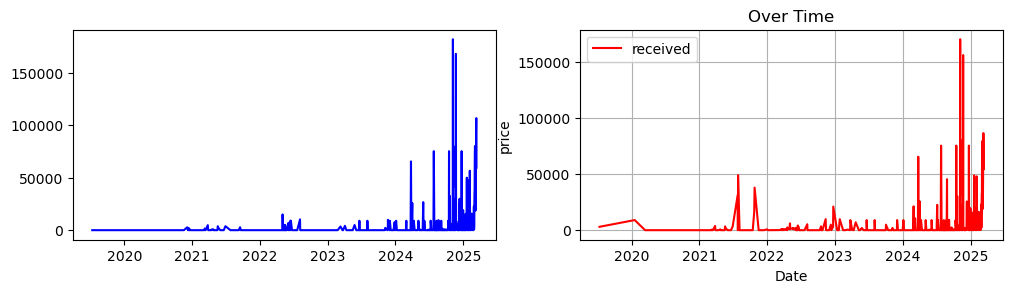

In [247]:
import matplotlib.pyplot as plt

df_daily_summary['date'] = pd.to_datetime(df_daily_summary['date'])

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(df_daily_summary["date"], df_daily_summary["sent_amount_btc"], label="sent", color="blue")

plt.subplot(2,2,2)
plt.plot(df_daily_summary["date"], df_daily_summary["received_amount_btc"], label="received", color="red")

plt.xlabel("Date")
plt.ylabel("price")
plt.title("Over Time")
plt.legend()
plt.grid()
plt.show()

In [248]:
df_whale_transactions

# 🔹 날짜별 총 입금량 및 출금량 계산
df_whale_summary = df_whale_transactions.groupby("date", as_index=False).agg({
    "sent_amount_btc": "sum",
    "received_amount_btc": "sum"
})

df_whale_summary

,date,sent_amount_btc,received_amount_btc
0,2010-05-27,0.000000,100.000000
1,2010-07-25,0.000000,4000.000000
2,2010-08-07,0.000000,350.000000
3,2010-08-10,0.000000,50.000000
4,2010-08-11,0.000000,50.000000
...,...,...,...
1329,2025-03-09,5.596968,1152.186954
1330,2025-03-10,118.959058,1986.647574
1331,2025-03-11,15767.299381,35957.329682
1332,2025-03-12,7109.660629,45619.752639


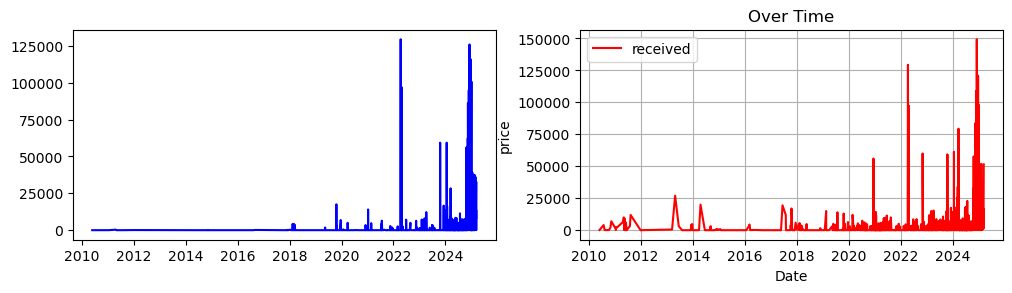

In [249]:
df_whale_summary['date'] = pd.to_datetime(df_whale_summary['date'])

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(df_whale_summary["date"], df_whale_summary["sent_amount_btc"], label="sent", color="blue")

plt.subplot(2,2,2)
plt.plot(df_whale_summary["date"], df_whale_summary["received_amount_btc"], label="received", color="red")

plt.xlabel("Date")
plt.ylabel("price")
plt.title("Over Time")
plt.legend()
plt.grid()
plt.show()

In [ ]:
all_deposits = []
for index, row in df_exchange_transactions.iterrows():
    if row['date'] == '2025-03-13':
        received_amount = row['received_amount_btc']
        all_deposits.append(received_amount)

all_deposits.sort(reverse=True)  # 상위 10개를 찾기 위해 정렬
top_10_sum = sum(all_deposits[:10])
total_sum = sum(all_deposits)

if total_sum > 0:
    whale_ratio = top_10_sum / total_sum
else:
    whale_ratio = 0
print(f"🐋 Whale Exchange Ratio: {whale_ratio:.4f}")

🐋 Whale Exchange Ratio: 0.9553


In [256]:
def calculate_whale_ratio(df, start_date, end_date):
    whale_ratios = {}
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    for single_date in date_range:
        date_str = single_date.strftime('%Y-%m-%d')
        all_deposits = []
        for index, row in df.iterrows():
            if row['date'] == date_str:
                received_amount = row['sent_amount_btc']
                all_deposits.append(received_amount)
        all_deposits.sort(reverse=True)
        if len(all_deposits) >= 11:
            top_10_sum = sum(all_deposits[:10])
            total_sum = sum(all_deposits)
            whale_ratio = top_10_sum / total_sum if total_sum > 0 else 0
            whale_ratios[date_str] = whale_ratio
    return whale_ratios

# 예제 사용법
whale_ratios = calculate_whale_ratio(df_exchange_transactions, '2022-03-14', '2025-03-13')
whale_ratios

{'2022-06-17': 1.0,
 '2024-03-25': 0.7537318952962017,
 '2024-04-27': 0,
 '2024-07-05': 0,
 '2024-07-17': 0,
 '2024-07-23': 1.0,
 '2024-07-31': 0,
 '2024-08-01': 0,
 '2024-08-18': 0,
 '2024-08-24': 1.0,
 '2024-08-25': 0,
 '2024-09-16': 0,
 '2024-09-20': 0,
 '2024-10-03': 0,
 '2024-10-29': 1.0,
 '2024-10-30': 1.0,
 '2024-11-06': 1.0,
 '2024-11-23': 1.0,
 '2024-11-26': 1.0,
 '2024-12-08': 1.0,
 '2024-12-10': 1.0,
 '2024-12-17': 1.0,
 '2024-12-20': 1.0,
 '2024-12-25': 1.0,
 '2024-12-26': 0,
 '2024-12-27': 0,
 '2024-12-30': 0,
 '2025-01-09': 1.0,
 '2025-01-10': 0,
 '2025-01-11': 0,
 '2025-01-13': 0,
 '2025-01-14': 1.0,
 '2025-01-20': 1.0,
 '2025-01-27': 1.0,
 '2025-01-28': 1.0,
 '2025-01-29': 1.0,
 '2025-01-31': 1.0,
 '2025-02-03': 1.0,
 '2025-02-04': 1.0,
 '2025-02-05': 0.7360803535897154,
 '2025-02-07': 1.0,
 '2025-02-11': 1.0,
 '2025-02-14': 1.0,
 '2025-02-19': 1.0,
 '2025-02-20': 1.0,
 '2025-02-21': 1.0,
 '2025-02-25': 1.0,
 '2025-02-26': 1.0,
 '2025-02-27': 1.0,
 '2025-02-28': 1.0,
 '

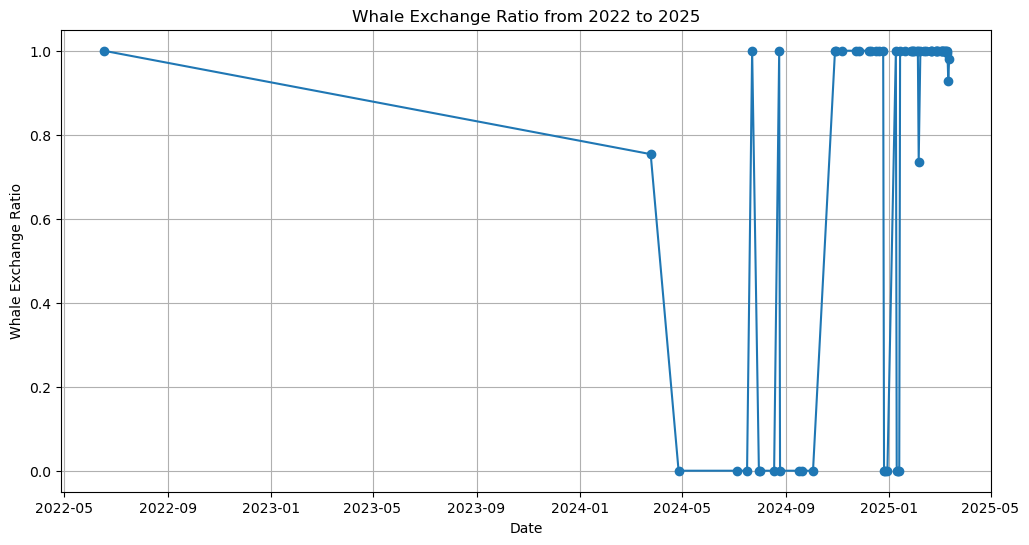

In [257]:
# 데이터프레임으로 변환
df_whale_ratios = pd.DataFrame(list(whale_ratios.items()), columns=['Date', 'Whale Ratio'])
df_whale_ratios['Date'] = pd.to_datetime(df_whale_ratios['Date'])
df_whale_ratios.set_index('Date', inplace=True)

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(df_whale_ratios.index, df_whale_ratios['Whale Ratio'], marker='o', linestyle='-')
plt.title('Whale Exchange Ratio from 2022 to 2025')
plt.xlabel('Date')
plt.ylabel('Whale Exchange Ratio')
plt.grid(True)
plt.show()

In [253]:
for i in range(len(df_whale_ratios.index)):
    if df_whale_ratios.iloc[i, :]['Whale Ratio'] != 0.0:
        print(df_whale_ratios.iloc[i, :])

Whale Ratio    1.0
Name: 2022-06-17 00:00:00, dtype: float64
Whale Ratio    0.753075
Name: 2024-03-25 00:00:00, dtype: float64
Whale Ratio    0.833333
Name: 2024-04-27 00:00:00, dtype: float64
Whale Ratio    0.999983
Name: 2024-07-05 00:00:00, dtype: float64
Whale Ratio    0.999286
Name: 2024-07-17 00:00:00, dtype: float64
Whale Ratio    1.0
Name: 2024-07-23 00:00:00, dtype: float64
Whale Ratio    0.588235
Name: 2024-07-31 00:00:00, dtype: float64
Whale Ratio    0.625
Name: 2024-08-01 00:00:00, dtype: float64
Whale Ratio    0.648652
Name: 2024-08-18 00:00:00, dtype: float64
Whale Ratio    0.999998
Name: 2024-08-24 00:00:00, dtype: float64
Whale Ratio    0.819082
Name: 2024-08-25 00:00:00, dtype: float64
Whale Ratio    0.918579
Name: 2024-09-16 00:00:00, dtype: float64
Whale Ratio    1.0
Name: 2024-09-20 00:00:00, dtype: float64
Whale Ratio    0.895024
Name: 2024-10-03 00:00:00, dtype: float64
Whale Ratio    1.0
Name: 2024-10-29 00:00:00, dtype: float64
Whale Ratio    0.997275
Name: 202

In [268]:
df_whale_transactions.to_csv('df_whale_transactions.csv')

In [269]:
df_exchange_transactions.to_csv('df_cex_transactions.csv')